### KNN

is one of the many supervised machine learning algorithms that we use for data mining as well as machine learning. Based on the similar data, this classifier then learns the patterns present within. It is a non-parametric and a lazy learning algorithm. By non-parametric, we mean that the assumption for underlying data distribution does not hold valid. In lazy loading, there is no requirement for training data points for generating models.
The training data is utilized in testing phase causing the testing phase slower and costlier as compared with the training phase.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [38]:
data = pd.read_csv('Iris_dataset.csv')
data.head(4)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [59]:
x=data.iloc[:,:4]
print(x.head(4))
y=data['Species']

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [61]:
knn = KNeighborsClassifier(n_neighbors=3)      #n=5
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [62]:
y_test

114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
100     virginica
40         setosa
86     versicolor
76     versicolor
71     versicolor
134     virginica
51     versicolor
73     versicolor
54     versicolor
63     versicolor
37         setosa
78     versicolor
90     versicolor
45         setosa
16         setosa
121     virginica
66     versicolor
24         setosa
8          setosa
126     virginica
22         setosa
44         setosa
97     versicolor
93     versicolor
26         setosa
Name: Species, dtype: object

In [72]:
y_pred.reshape(-1,1)

array([['virginica'],
       ['versicolor'],
       ['setosa'],
       ['virginica'],
       ['setosa'],
       ['virginica'],
       ['setosa'],
       ['versicolor'],
       ['versicolor'],
       ['versicolor'],
       ['virginica'],
       ['versicolor'],
       ['versicolor'],
       ['versicolor'],
       ['virginica'],
       ['setosa'],
       ['versicolor'],
       ['versicolor'],
       ['setosa'],
       ['setosa'],
       ['virginica'],
       ['versicolor'],
       ['setosa'],
       ['setosa'],
       ['virginica'],
       ['setosa'],
       ['setosa'],
       ['versicolor'],
       ['versicolor'],
       ['setosa']], dtype=object)

In [64]:
print('knn score', knn.score(x_test,y_test)*100) 
from sklearn import metrics
print('accuracy=', metrics.accuracy_score(y_test, y_pred))


knn score 96.66666666666667
accuracy= 0.9666666666666667


In [67]:
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix is : ', cm, sep='\n') #x-axis : predict y-axis: actual 

confusion matrix is : 
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [66]:
np.unique(y_test)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

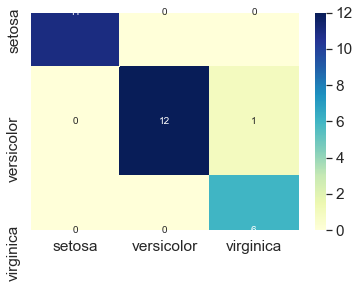

In [94]:
import seaborn as sn
df_cm = pd.DataFrame(cm, index = list(np.unique(y_test)),
                  columns = list(np.unique(y_test)))


sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10},cmap="YlGnBu") # font size

plt.show()


In [95]:
confusion_matrix(y_test, y_pred).ravel()

array([11,  0,  0,  0, 12,  1,  0,  0,  6], dtype=int64)

In [101]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label]/ col.sum()

def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label]/ row.sum()

print("label precision recall")
for label in range(0,3):
    print(f"{label:5d} {precision(label,cm):9.3f} {recall(label,cm):6.3f}")
    

label precision recall
    0     1.000  1.000
    1     1.000  0.923
    2     0.857  1.000


### what is the best value of K for given dataset?
- how to choose value of k
- plot a graph of all possible values of k with 
respect to the number of misclassification found for each k
- choose one k, for which there is a least value of misclassification
                                                   

<img src = "knn7.png">

In [122]:
k_list = [i for i in range(1,30)]


In [123]:
mis_class=[]
for k in k_list:
    knn= KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    prediction = knn.predict(x_test)
    cm = confusion_matrix(y_test, prediction)
    print(cm)
    mis_class.append(sum(prediction != y_test))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]
[

In [124]:
#mis_class.append(sum(prediction != y_test))
print(mis_class)

[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1]


In [125]:
len(mis_class)

29

Text(0, 0.5, 'total error')

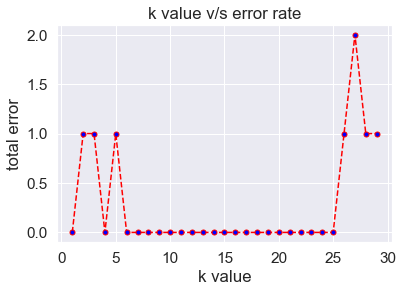

In [126]:
plt.plot(k_list, mis_class, color='red', linestyle='dashed', marker='o', markerfacecolor = 'blue', markersize=5)

plt.title('k value v/s error rate')
plt.xlabel('k value')
plt.ylabel('total error')

while calculating, distance: if one of the attributes biases the distance(influence) prediction may be biased. 
    so in that case we must go for mormalization
    example: loan amount influence more compared to age of the person while calculating distance

In [3]:
l=[[1,2,4],[5,0],[3,8]]
max(l)

[5, 0]